### CSS -  674<br>Jericho McLeod<br>Assignment  1

Copied code from assignment to implement  G

In [2]:
import networkx as nx
import random

In [3]:
G=nx.Graph()
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_edge(1,2)
G.add_edge(1,4)
G.add_edge(2,4)
G.add_edge(2,3)
G.add_edge(3,4)
nx.draw_networkx(G)

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [4]:
print(G.degree(1))
print(list(G.neighbors(1)))
print(G.has_edge(1,2))

2
[2, 4]
True


In [5]:
def hypot_len(x,y):
    h2 = x**2+y**2
    h = h2**0.5
    return(h)

print(hypot_len(3,4))

def m(H):
    s=0
    for i in H.nodes():
        s=s+H.degree(i)
    s=s/2
    return(s)

print(m(G))
print(G.size())
print(G.order())
print(list(G.nodes()))
print(list(G.edges()))
VG = list(G.nodes())
EG = list(G.edges())
VG[0]
VG[3]

5.0
5.0
5
4
[1, 2, 3, 4]
[(1, 2), (1, 4), (2, 4), (2, 3), (3, 4)]


4

In [6]:
A=nx.adjacency_matrix(G)
A[0,1]

1

#### Task 1: 
Create a function that takes in G, i, and j and returns 1 if a link exists and 0 otherwise.

In [7]:
def link_indicator(G,i,j):
    if (i,j) in G.edges() or (j,i) in G.edges():
        return(1)
    else:
        return(0)

link_indicator(G,1,4)

1

#### Task  2: 
Using the link indicator from Task 1, create a function that takes input G and a node and returns the degree of that node. 

In [8]:
def degree(G,i): #should  have used link indicator function
    c = 0
    for j in G.nodes():
        if j != i:
            c += link_indicator(G,i,j)   
#    for iter in G.edges():
#        if i in iter:
#            c+=1
    return(c)

degree(G,4)

3

#### Task 3: 
Create two functins that take G as an input and generate a printed output of each node and its degree. Once function should use <b>degree</b> from networkx and the other should use the function from task 2. 

In [9]:
def all_degrees_1(G):
    print("%6s %6s"%("Node","Degree"))
    for i in G:
        print("%6d %6d" % (i,degree(G,i))) #my degree functino

def all_degrees_2(G):
    print("%6s %6s"%("Node","Degree"))
    for  i in G:
        print("%6d %6d" % (i,G.degree(i))) #degree function from nx for class G
        
all_degrees_1(G) # using bespoke functions
all_degrees_2(G) # using networkx functions

  Node Degree
     1      2
     2      3
     3      2
     4      3
  Node Degree
     1      2
     2      3
     3      2
     4      3


#### Task 4: 
Craete a function that creates ring graphs from input  $n$. 

1000 True
2000 True
3000 True
4000 True
5000 True
6000 True
7000 True
8000 True
9000 True
10000 True


True

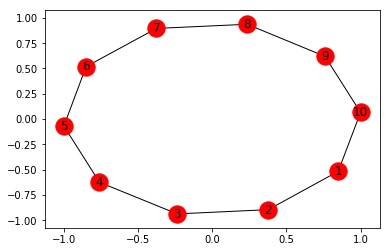

In [10]:
def create_ring(n):
    new_g = nx.Graph()
    for i in range(1,n):
        new_g.add_edge(i,i+1)
    new_g.add_edge(1,n)
    return(new_g)

G2 = create_ring(10)
nx.draw_networkx(G2)

def verify_ring(G):
    is_ring = True
    EG = G.edges()
    VG = G.nodes()
    if len(EG) != len(VG):    #verify m and n are equal
        is_ring = False
    for i in range(0,10):     #verify degree of 10 randomly selected nodes ==2
        node = random.randint(1,len(VG))
        if G.degree(node) != 2:
            is_ring = False
    return(is_ring)

def verify_ring_creator():
    """This function creates 10 networks with n*100 nodes
    using the ring creator function, then verifies they
    are  rings by caling the verify ring function"""
    func_ok = True
    for i in range(1,11):
        temp_G = create_ring(i*1000)
        temp_G_state = verify_ring(temp_G)
        print(i*1000,temp_G_state)
        if temp_G_state is False:
            func_ok = False
    return(func_ok)

verify_ring(G2)
verify_ring_creator()

#### Task 5: 
Create 2 functions that take graph G and node i as inputs and return the number of Vs that visit the node. One function should use nx.Graph() and the other should use the degree function in task 2. 

3.0
3.0

1.0
1.0


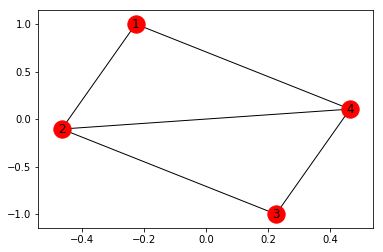

In [11]:
def count_V3(G,i):     # This version usess my degree function
    i_d = degree(G,i)
    v = i_d * (i_d-1)/2
    return(v)

def count_V4(G,i):
    i_d = G.degree(i)
    v = i_d * (i_d-1)/2
    return(v)

G2 = create_ring(101)   # create a ring network with < 100 nodes
                        # 101 is the minimum viable count
nx.draw_networkx(G)
print(count_V3(G,2))
print(count_V4(G,2))
print()
print(count_V3(G2,50)) 
print(count_V4(G2,50))

#### Task 6: 
Create a function  that takes graph  G and  node i as input and determine the number of triangles that visit i. 

1
1
1.0

2
2
2.0

0
0
0.0



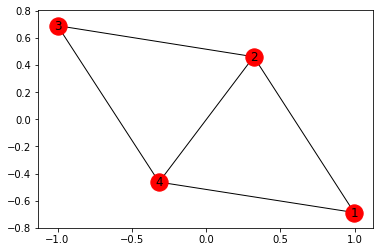

In [25]:
def count_triangles(G,node):
    i_n = list(G.neighbors(node))
    t   = 0
    for i in i_n:
        for j in i_n:
            if i<j: 
                if G.has_edge(i,j):
                    t +=1
    return(t)



def count_triangles2(G,node):
    A   = nx.adjacency_matrix(G)
    i_n = list(G.neighbors(node))
    t   = 0
    for i in i_n:
        for j in i_n:
            if i<j:
                if A[i-1,j-1]:
                    t  +=1
    return(t)

def count_triangles3(G,node):
    A = nx.adjacency_matrix(G)
    A = A**3
    t = A[node-1,node-1]/2
    return(t)
                
nx.draw_networkx(G)
print(count_triangles(G,1))
print(count_triangles2(G,1))
print(count_triangles3(G,1))
print()
print(count_triangles(G,2))
print(count_triangles2(G,2))
print(count_triangles3(G,2))
print()
print(count_triangles(G2,50))
print(count_triangles2(G2,50))
print(count_triangles3(G2,50))
print()


#### Task 7:
Create a function that takes graph G and node i as input and retturns the local clustering of node i. Use functions from 5 and 6. 

In [23]:
def local_cluster(G,node):
    t  = count_triangles(G,node)
    vs = count_V3(G,node)
    c  = t/vs
    return(c)

print(local_cluster(G,1))
print(nx.clustering(G,1))
print(local_cluster(G,2))
print(nx.clustering(G,2))
print()
print(local_cluster(G2,50))
print(nx.clustering(G2,50))

1.0
1.0
0.6666666666666666
0.6666666666666666

0.0
0


#### Task 8:
Create a function that takes graph G as an input and determines the global clustering of the network. Use functions from task 5 and tasks 6. 

In [25]:
def global_clustering(G):
    v_g = G.nodes()
    c   = 0
    t   = 0
    vs  = 0
    for i in v_g:
        t += count_triangles(G,i)
        vs+= count_V3(G,i)
    c = t/vs
    return(c)
    
print(global_clustering(G))
print(nx.transitivity(G))
print()
print(global_clustering(G2))
print(nx.transitivity(G2))

0.75
0.75

0.0
0
